In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import pandas as pd
import random
import math

In [2]:
data = np.load('k49-test-imgs.npz')
x_test = data['arr_0']
data = np.load('k49-train-imgs.npz')
x_train = data['arr_0']
data = np.load('k49-train-labels.npz')
y_train = data['arr_0']
data = np.load('k49-test-labels.npz')
y_test = data['arr_0']

In [3]:
data = pd.read_csv("k49_classmap.csv")
print(data.char[0])

あ


In [4]:
#print(y.files)
print(x_train[1].shape)

(28, 28)


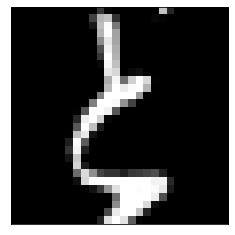

70


In [5]:
plt.imshow(x_test[10], cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
print(x_train[10].argmax())

In [6]:
num_classes = 49
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (232365, 28, 28, 1)
232365 train samples
38547 test samples


In [7]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(50, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(1, 1)),
        layers.Conv2D(100, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(50, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

2021-08-25 14:51:09.255027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-25 14:51:09.304313: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-25 14:51:09.304892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-25 14:51:09.306082: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [8]:
batch_size = 128
epochs = 12

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, shuffle = True)

2021-08-25 14:51:11.705471: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/12


2021-08-25 14:51:13.432301: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8101


1634/1634 [==============================] - 48s 26ms/step - loss: 0.7105 - accuracy: 0.8096 - val_loss: 0.2725 - val_accuracy: 0.9262
Epoch 2/12
1634/1634 [==============================] - 41s 25ms/step - loss: 0.3147 - accuracy: 0.9117 - val_loss: 0.1942 - val_accuracy: 0.9481
Epoch 3/12
1634/1634 [==============================] - 41s 25ms/step - loss: 0.2464 - accuracy: 0.9291 - val_loss: 0.1712 - val_accuracy: 0.9537
Epoch 4/12
1634/1634 [==============================] - 41s 25ms/step - loss: 0.2119 - accuracy: 0.9389 - val_loss: 0.1564 - val_accuracy: 0.9581
Epoch 5/12
1634/1634 [==============================] - 35s 22ms/step - loss: 0.1910 - accuracy: 0.9447 - val_loss: 0.1431 - val_accuracy: 0.9613
Epoch 6/12
1634/1634 [==============================] - 35s 22ms/step - loss: 0.1733 - accuracy: 0.9500 - val_loss: 0.1304 - val_accuracy: 0.9658
Epoch 7/12
1634/1634 [==============================] - 35s 21ms/step - loss: 0.1625 - accuracy: 0.9530 - val_loss: 0.1269 - val_accura

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.21934454143047333
Test accuracy: 0.9466884732246399


In [10]:
y_pred = model.predict(x_test)
print(y_pred.shape)

(38547, 49)


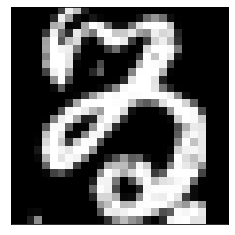

る


In [13]:
plt.imshow(x_test[2000], cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
print(data.char[y_pred[2000].argmax()])